 ## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Model Implementation </h2>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
#Loading data
df = pd.read_excel('Crude_oil_WTI.xls')
df.set_index('Date')
df.head()

Date  Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
0 1986-01-02                                              25.56  
1 1986-01-03                                              26.00  
2 1986-01-06                                              26.53  
3 1986-01-07                                              25.85  
4 1986-01-08                                              25.87

In [3]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

In [4]:
df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)


In [5]:
df

Date  Price  Year  Month  Week
0    1986-01-02  25.56  1986      1     1
1    1986-01-03  26.00  1986      1     1
2    1986-01-06  26.53  1986      1     2
3    1986-01-07  25.85  1986      1     2
4    1986-01-08  25.87  1986      1     2
...         ...    ...   ...    ...   ...
9434 2023-06-13  69.39  2023      6    24
9435 2023-06-14  68.22  2023      6    24
9436 2023-06-15  70.61  2023      6    24
9437 2023-06-16  71.81  2023      6    24
9438 2023-06-20  70.94  2023      6    25

[9439 rows x 5 columns]

In [6]:
df = df.set_index(['Date'])

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Splitting Input & Taret Variables </h2>

In [7]:
X= df.drop(['Price'], axis=1)
Y= df['Price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7551, 3), (1888, 3), (7551,), (1888,))

In [10]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [11]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

X_train=scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> LINEAR REGRESSION </h2>

In [12]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

LinearRegression(normalize=False)

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([78.93704067, 56.0404497 , 60.01221625, ..., 34.4699393 ,
       21.96749124, 41.42322131])

In [14]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  56.076243539000224


In [15]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 14.972531719615885
MSE 373.7734747021396
RMSE 19.333222046574118


In [16]:
test_r2_LR=metrics.explained_variance_score(y_test, y_pred)
test_r2_LR

0.5607645593267532

In [17]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

lr_df

Actual  Predicted
Date                         
2021-02-03   55.67  78.937041
2009-07-16   62.07  56.040450
2011-08-01   94.98  60.012216
2011-09-27   84.18  60.404378
2021-01-08   52.14  78.804861
...            ...        ...
2022-07-19  106.12  81.842709
1992-03-03   18.67  21.575330
1998-08-28   13.54  34.469939
1992-04-29   20.77  21.967491
2002-03-05   23.18  41.423221

[1888 rows x 2 columns]

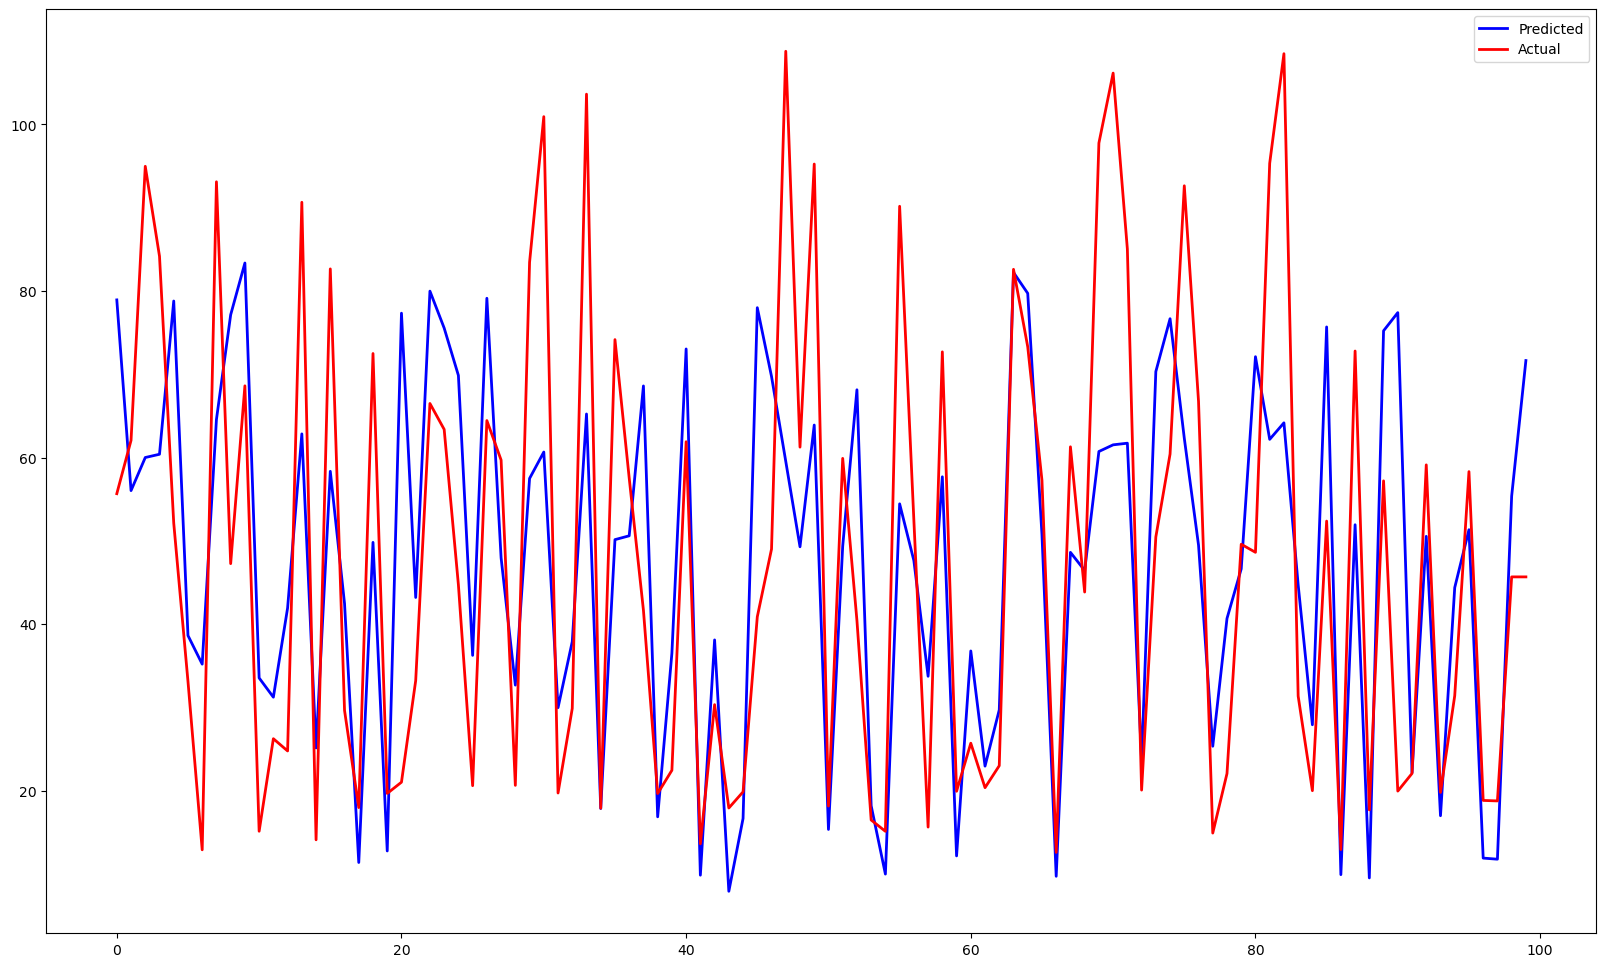

In [18]:
plt.figure(figsize=(20,12))
plt.plot(lr.predict(X_test[:100]), label="Predicted", linewidth=2.0,color='blue')
plt.plot(y_test[:100].values, label="Actual", linewidth=2.0,color='red')
plt.legend(loc="best")

plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> RANDOM FOREST </h2>

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  99.66164751547072


In [21]:
y_pred = rf.predict(X_test)
y_pred

array([56.19742329, 61.11446491, 89.9562956 , ..., 13.59643   ,
       20.51660833, 23.61649167])

In [22]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 0.9326829971342507
MSE 2.8792433527151142
RMSE 1.696833330859314


In [23]:
test_r2_RF=metrics.explained_variance_score(y_test, y_pred)
test_r2_RF

0.9966171896067871

In [24]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

rf_df

Actual   Predicted
Date                          
2021-02-03   55.67   56.197423
2009-07-16   62.07   61.114465
2011-08-01   94.98   89.956296
2011-09-27   84.18   83.012210
2021-01-08   52.14   49.761732
...            ...         ...
2022-07-19  106.12  100.532212
1992-03-03   18.67   18.505325
1998-08-28   13.54   13.596430
1992-04-29   20.77   20.516608
2002-03-05   23.18   23.616492

[1888 rows x 2 columns]

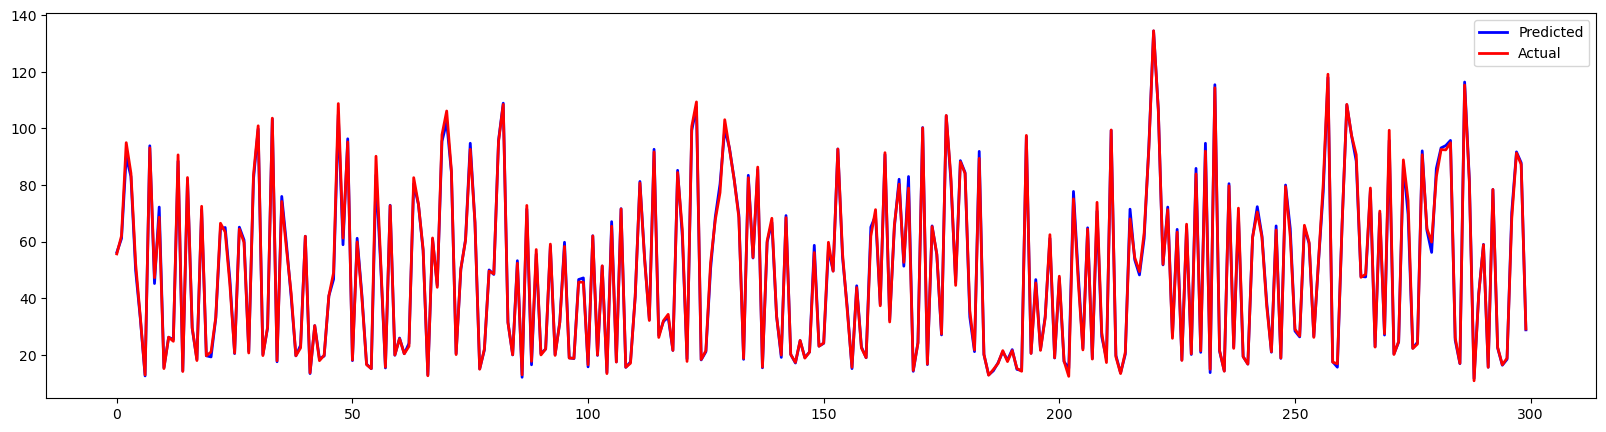

In [25]:
plt.figure(figsize=(20,5))
plt.plot(rf.predict(X_test[:300]), label="Predicted", linewidth=2.0,color='blue')
plt.plot(y_test[:300].values, label="Actual", linewidth=2.0,color='red')
plt.legend(loc="best")

plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> K-NEAREST NEIGHBOUR </h2>

In [26]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [27]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  99.43121869600185


In [28]:
y_pred = knn.predict(X_test)
y_pred

array([56.8 , 59.62, 91.87, ..., 13.35, 20.29, 23.62])

In [29]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1.1170444915254238
MSE 4.840099788135594
RMSE 2.200022679004831


In [30]:
test_r2_KNN =metrics.explained_variance_score(y_test, y_pred)
test_r2_KNN

0.9943126951049611

In [31]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

Actual  Predicted
Date                         
2021-02-03   55.67      56.80
2009-07-16   62.07      59.62
2011-08-01   94.98      91.87
2011-09-27   84.18      85.70
2021-01-08   52.14      49.78
...            ...        ...
2022-07-19  106.12      98.44
1992-03-03   18.67      18.36
1998-08-28   13.54      13.35
1992-04-29   20.77      20.29
2002-03-05   23.18      23.62

[1888 rows x 2 columns]

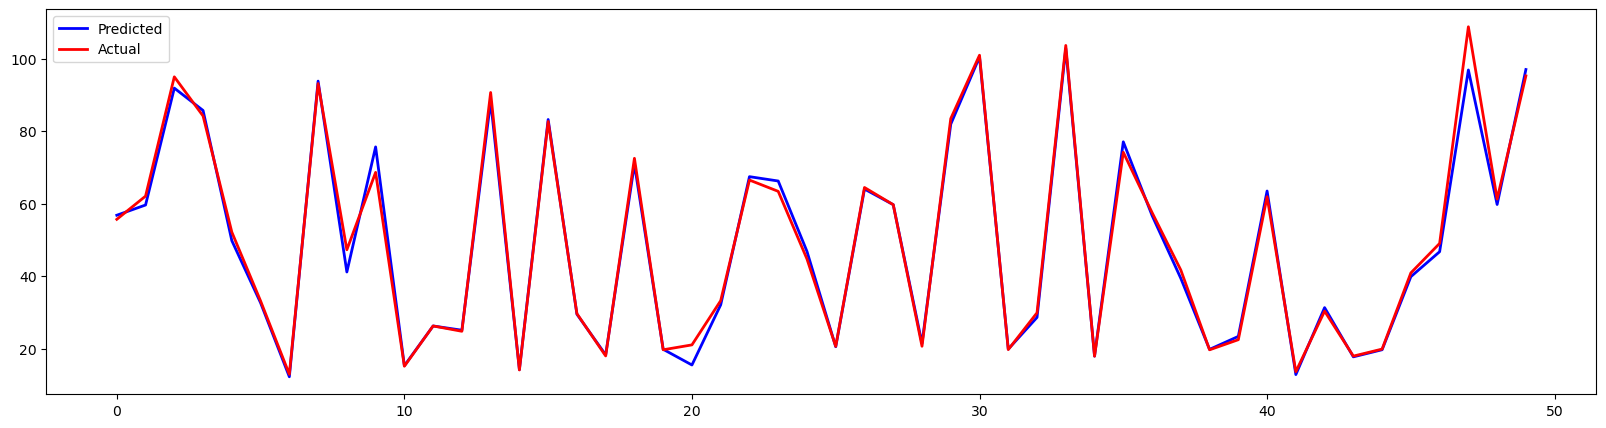

In [32]:
plt.figure(figsize=(20,5))
plt.plot(knn.predict(X_test[:50]), label="Predicted", linewidth=2.0,color='blue')
plt.plot(y_test[:50].values, label="Actual", linewidth=2.0,color='red')
plt.legend(loc="best")

plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> XG-BOOST </h2>

In [33]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  99.56556321629779


In [35]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1.1170444915254238
MSE 4.840099788135594
RMSE 2.200022679004831


In [36]:
test_r2_XGB =metrics.explained_variance_score(y_test, y_pred)
test_r2_XGB

0.9943126951049611

In [37]:
y_pred = xgbr.predict(X_test)

y_pred 

array([55.54059 , 63.94871 , 89.46887 , ..., 13.989029, 20.545362,
       23.710497], dtype=float32)

In [38]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

Actual  Predicted
Date                         
2021-02-03   55.67  55.540588
2009-07-16   62.07  63.948711
2011-08-01   94.98  89.468872
2011-09-27   84.18  86.554733
2021-01-08   52.14  49.855366
...            ...        ...
2022-07-19  106.12  99.884018
1992-03-03   18.67  18.835632
1998-08-28   13.54  13.989029
1992-04-29   20.77  20.545362
2002-03-05   23.18  23.710497

[1888 rows x 2 columns]

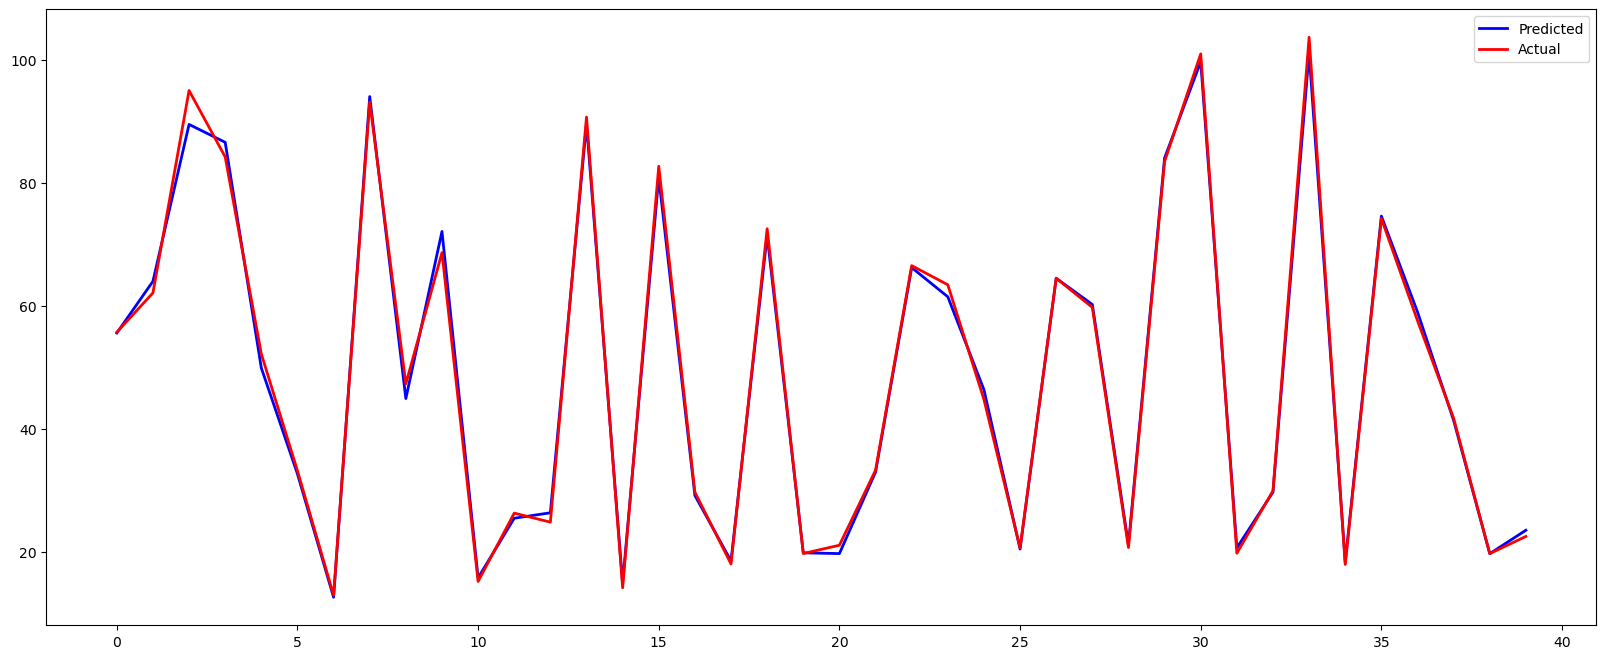

In [39]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:40]), label="Predicted", linewidth=2.0,color='blue')
plt.plot(y_test[:40].values, label="Actual", linewidth=2.0,color='red')
plt.legend(loc="best")

plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> LSTM </h2>

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [41]:
df_new = df.iloc[:,[0]]
df_new.head()

Price
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(df_new)

# Transform your data using the scaler
df_new = scaler.transform(df_new)

In [43]:
df_new

array([[0.34307971],
       [0.34549344],
       [0.3484009 ],
       ...,
       [0.5902134 ],
       [0.59679631],
       [0.5920237 ]])

In [44]:
df_new.shape

(9439, 1)

In [45]:
# 0.80 - 0.20 train and test split dividing input class and target class 
training_size=int(len(df_new)*0.80)
test_size=len(df_new)-training_size
train_data,test_data=df_new[0:training_size,:],df_new[training_size:len(df_new),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (7551, 1)
test_data:  (1888, 1)


In [46]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (7400, 150)
y_train:  (7400,)
X_test:  (1737, 150)
y_test (1737,)


In [48]:
X_train

array([[0.34307971, 0.34549344, 0.3484009 , ..., 0.26627901, 0.27966427,
        0.28158429],
       [0.34549344, 0.3484009 , 0.34467058, ..., 0.27966427, 0.28158429,
        0.28405288],
       [0.3484009 , 0.34467058, 0.3447803 , ..., 0.28158429, 0.28405288,
        0.28613747],
       ...,
       [0.52992485, 0.52707225, 0.52608481, ..., 0.42542103, 0.42465303,
        0.42547589],
       [0.52707225, 0.52608481, 0.53409403, ..., 0.42465303, 0.42547589,
        0.42191014],
       [0.52608481, 0.53409403, 0.5371112 , ..., 0.42547589, 0.42191014,
        0.42821877]])

In [49]:
y_train

array([0.28405288, 0.28613747, 0.28421746, ..., 0.42191014, 0.42821877,
       0.42229415])

In [50]:
X_test

array([[0.40836031, 0.40671458, 0.40452027, ..., 0.44824181, 0.45970706,
        0.44900982],
       [0.40671458, 0.40452027, 0.39843107, ..., 0.45970706, 0.44900982,
        0.45323386],
       [0.40452027, 0.39843107, 0.40205168, ..., 0.44900982, 0.45323386,
        0.45482473],
       ...,
       [0.70645674, 0.68999945, 0.6734873 , ..., 0.5877448 , 0.57084865,
        0.58352076],
       [0.68999945, 0.6734873 , 0.67749191, ..., 0.57084865, 0.58352076,
        0.57710242],
       [0.6734873 , 0.67749191, 0.69186461, ..., 0.58352076, 0.57710242,
        0.5902134 ]])

In [51]:
y_test 

array([0.45323386, 0.45482473, 0.45098469, ..., 0.57710242, 0.5902134 ,
       0.59679631])

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (7400, 150, 1)
X_test:  (1737, 150, 1)


In [53]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 150, 32)           8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=1)

Epoch 1/10
37/37 [==============================] - 20s 364ms/step - loss: 0.0295 - val_loss: 0.0019
Epoch 2/10
37/37 [==============================] - 13s 362ms/step - loss: 0.0013 - val_loss: 8.3338e-04
Epoch 3/10
37/37 [==============================] - 13s 363ms/step - loss: 3.7292e-04 - val_loss: 7.4121e-04
Epoch 4/10
37/37 [==============================] - 14s 379ms/step - loss: 3.4876e-04 - val_loss: 7.3574e-04
Epoch 5/10
37/37 [==============================] - 15s 418ms/step - loss: 3.3891e-04 - val_loss: 7.1969e-04
Epoch 6/10
37/37 [==============================] - 14s 379ms/step - loss: 3.3170e-04 - val_loss: 7.1130e-04
Epoch 7/10
37/37 [==============================] - 13s 365ms/step - loss: 3.1376e-04 - val_loss: 7.0819e-04
Epoch 8/10
37/37 [==============================] - 13s 362ms/step - loss: 3.0572e-04 - val_loss: 6.9020e-04
Epoch 9/10
37/37 [==============================] - 13s 359ms/step - loss: 3.0153e-04 - val_loss: 6.6548e-04
Epoch 10/10
37/37 [============

In [56]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

55/55 [==============================] - 1s 23ms/step


((7400, 1), (1737, 1))

In [57]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [58]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.985927502680797
Train data MSE:  8.915763051265582
Test data MAE:  1.946189036255914
-------------------------------------------------------------------------------------
Test data RMSE:  4.535486608199447
Test data MSE:  20.570638773156524
Test data MAE:  3.2043702833475445


In [59]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict)*100)
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict)*100)

Train data explained variance regression score: 99.06140581420402
Test data explained variance regression score: 94.144885177523


In [60]:
train_r2_LSTM=r2_score(original_ytrain, train_predict)
train_r2_LSTM=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_LSTM)
print("Test data R2 score:", train_r2_LSTM)

Train data R2 score: 0.9414447950003697
Test data R2 score: 0.9414447950003697


In [61]:
df.head()

Price  Year  Month  Week
Date                                
1986-01-02  25.56  1986      1     1
1986-01-03  26.00  1986      1     1
1986-01-06  26.53  1986      1     2
1986-01-07  25.85  1986      1     2
1986-01-08  25.87  1986      1     2

In [62]:
df = df.reset_index()
df['Date']

0      1986-01-02
1      1986-01-03
2      1986-01-06
3      1986-01-07
4      1986-01-08
          ...    
9434   2023-06-13
9435   2023-06-14
9436   2023-06-15
9437   2023-06-16
9438   2023-06-20
Name: Date, Length: 9439, dtype: datetime64[ns]

In [63]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df_new)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_new)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_new)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original Oil Price','Train Predicted Oil Price','Test Predicted Oil Price'])


plotdf = pd.DataFrame({'Date': df['Date'],
                       'Original Oil Price': df['Price'],
                      'Train Predicted Price': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'Test Predicted Price': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['Original Oil Price'],plotdf['Train Predicted Price'],
                                          plotdf['Test Predicted Price']],
              labels={'value':'Price','Date': 'Date'})
fig.update_layout(title_text='Comparision between Original Oil Price vs Predicted Oil Price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (9439, 1)
Test predicted data:  (9439, 1)


In [64]:
original_ytest=  pd.DataFrame(original_ytest, columns =['Actual',])

In [65]:
test_predict=pd.DataFrame(test_predict, columns =['Predicted',])

In [66]:
original_ytest['predicted']=test_predict
comparison=original_ytest
comparison

Actual  predicted
0      45.64  47.560947
1      45.93  47.346352
2      45.23  47.130196
3      44.64  46.914574
4      44.96  46.697746
...      ...        ...
1732   67.08  71.399292
1733   69.39  71.351547
1734   68.22  71.273476
1735   70.61  71.158119
1736   71.81  71.027428

[1737 rows x 2 columns]

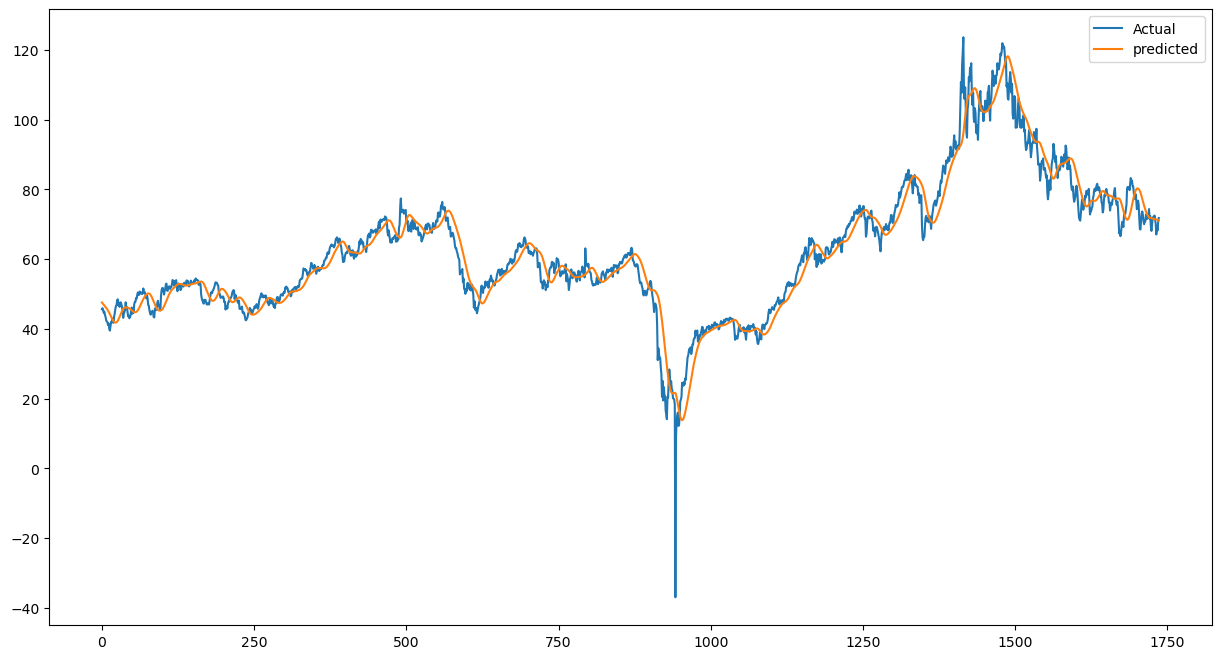

In [67]:
comparison.plot(figsize=(15,8))

plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> ARIMA </h2>

In [68]:
#Loading data
df = pd.read_excel('Crude_oil_WTI.xls',parse_dates=True)
df.head()

Date  Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
0 1986-01-02                                              25.56  
1 1986-01-03                                              26.00  
2 1986-01-06                                              26.53  
3 1986-01-07                                              25.85  
4 1986-01-08                                              25.87

In [71]:
df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)

In [72]:
x=df
train=x[0:7550]
test=x[7550:]
train.shape, test.shape

((7550, 2), (1889, 2))

In [74]:
import pmdarima as pm
auto_arima = pm.auto_arima(train.Price, stepwise=True)
auto_arima

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [75]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train.Price,order=(3,1,3))
result=model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7550
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -11756.884
Date:                Thu, 20 Jul 2023   AIC                          23527.768
Time:                        12:47:58   BIC                          23576.272
Sample:                             0   HQIC                         23544.418
                               - 7550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3949      0.076    -18.433      0.000      -1.543      -1.247
ar.L2         -1.1744      0.074    -15.865      0.000      -1.320      -1.029
ar.L3         -0.4222      0.067     -6.343      0.0

In [76]:
residuals = pd.DataFrame(result.resid)

(array([6.70602286e-05, 3.35301143e-04, 8.61723938e-03, 2.33235475e-01,
        1.05955161e-02, 2.01180686e-04, 3.35301143e-05, 0.00000000e+00,
        3.35301143e-05, 3.35301143e-05]),
 array([-13.94190264,  -9.99171238,  -6.04152211,  -2.09133185,
          1.85885842,   5.80904868,   9.75923894,  13.70942921,
         17.65961947,  21.60980974,  25.56      ]),
 <BarContainer object of 10 artists>)

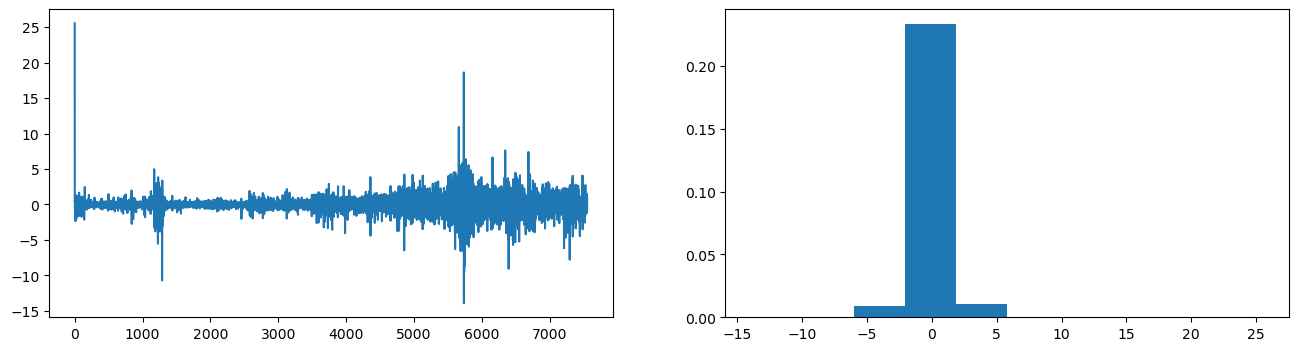

In [77]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

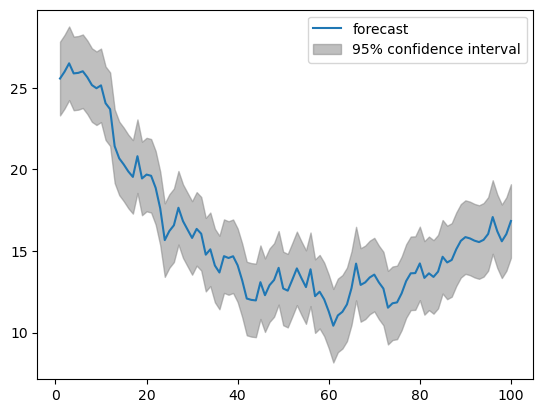

In [78]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=1,end=100,dynamic=False);

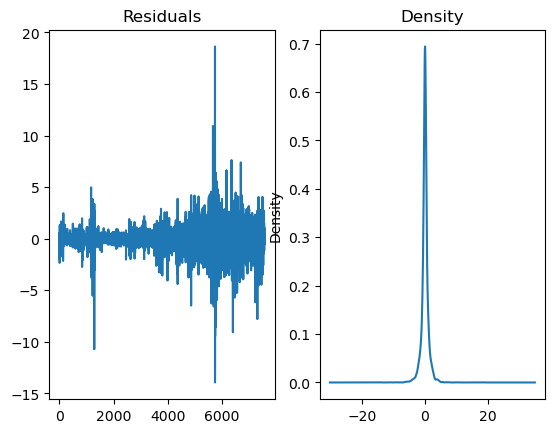

In [79]:
residuals = result.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [80]:
pred=result.predict(start=7550,end=9438)
pred

7550    39.969195
7551    40.013033
7552    40.065440
7553    39.953856
7554    40.029451
          ...    
9434    40.011885
9435    40.011885
9436    40.011885
9437    40.011885
9438    40.011885
Name: predicted_mean, Length: 1889, dtype: float64

In [81]:
pred = pd.DataFrame(pred)

In [82]:
pred.rename(columns={"predicted_mean":"Price"},inplace=True)

In [83]:
pred.head()

Price
7550  39.969195
7551  40.013033
7552  40.065440
7553  39.953856
7554  40.029451

In [84]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test.Price, pred)
mape = mean_absolute_percentage_error(test.Price,pred)
rmse = np.sqrt(mean_squared_error(test.Price, pred))

print(f'mae score: {mae}')
print(f'mape score: {mape}')
print(f'rmse score: {rmse}')

mae score: 22.134621294335272
mape score: 0.3329528538295178
rmse score: 28.001507295366196


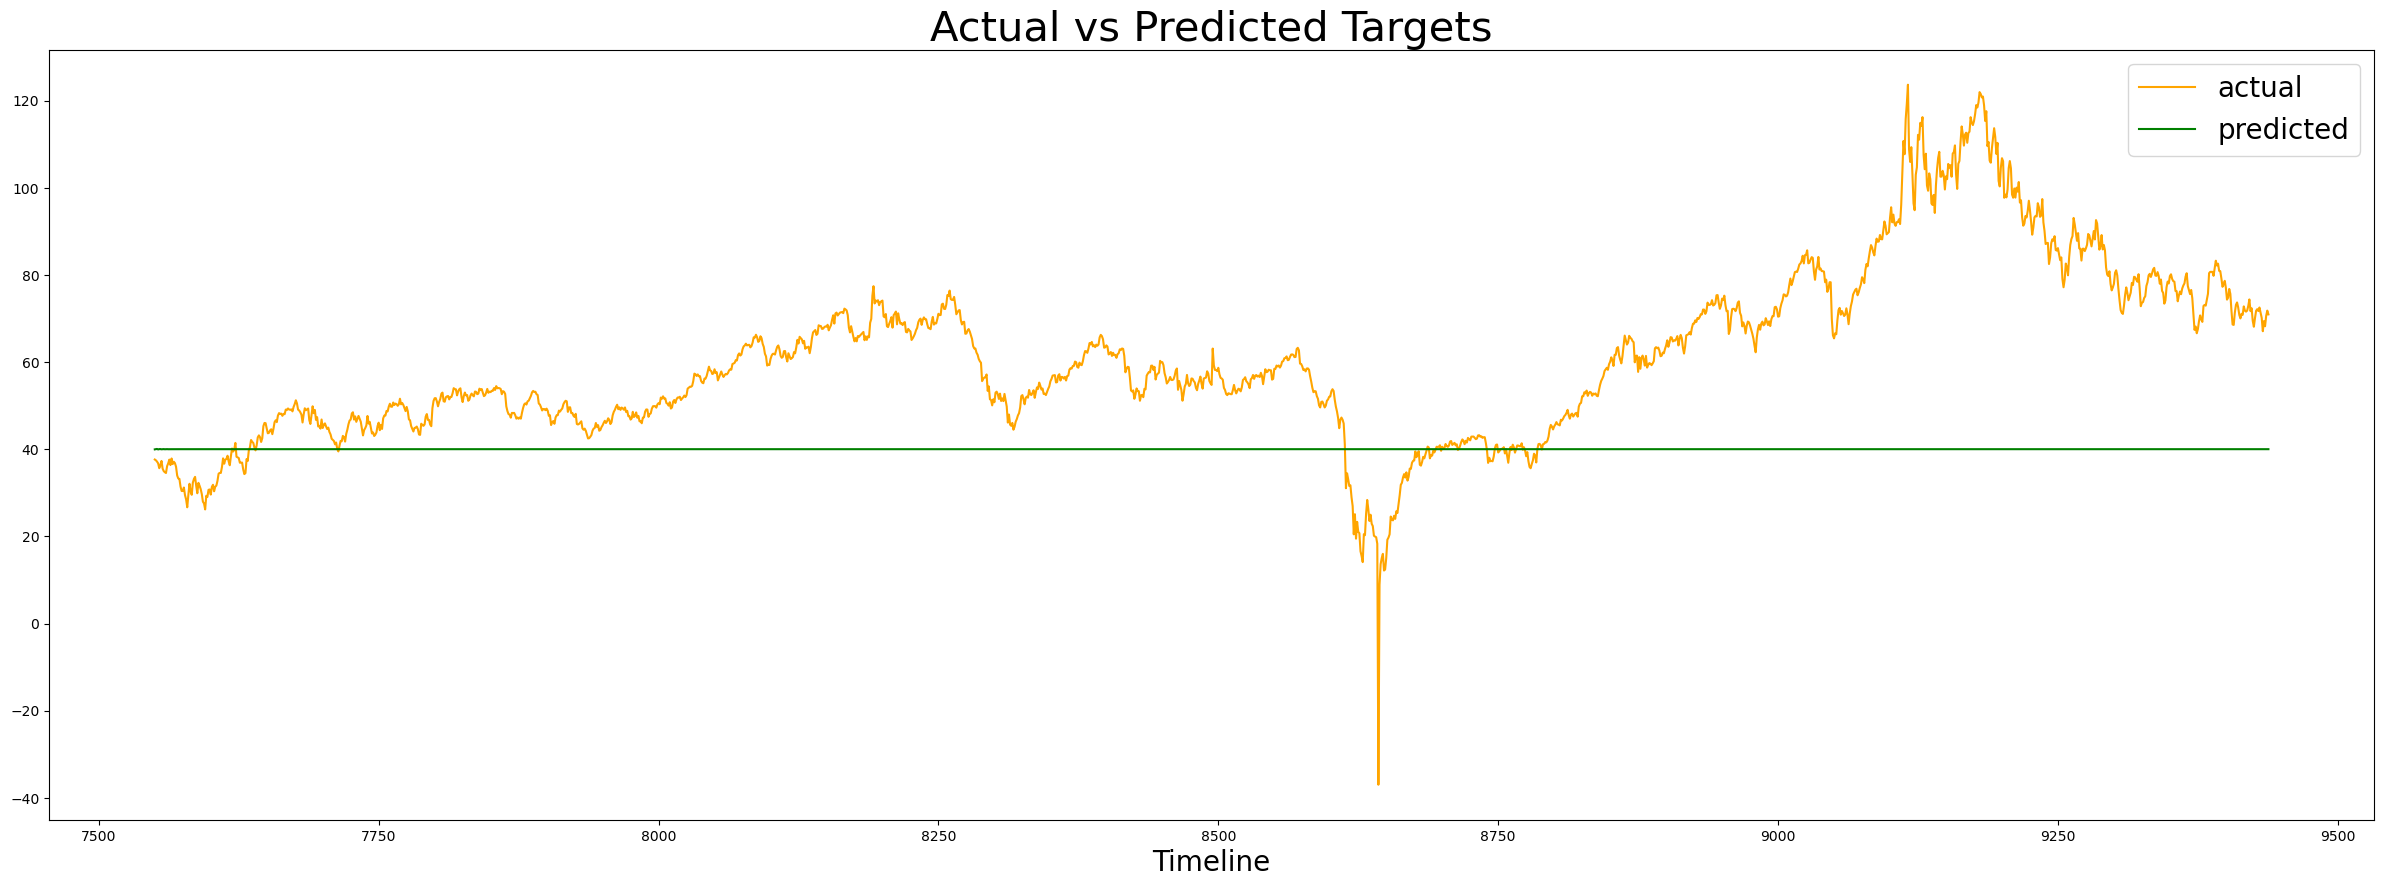

In [85]:
plt.figure(figsize=(30,10))
plt.plot(test.Price,color="orange",label="actual")
plt.plot(pred.Price,color="green",label="predicted")
plt.title("Actual vs Predicted Targets",fontsize=30)
plt.xlabel('Timeline',fontsize=20)
plt.legend(fontsize=20)
plt.show()

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> FB PROPHET </h2>

In [86]:
# Load the data
df= pd.read_excel("Crude_oil_WTI.xls")

In [87]:
df.rename(columns={'Date': 'ds', 'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'y'}, inplace=True)

In [88]:
df = df.resample('M', on='ds').mean()
df

y
ds                   
1986-01-31  22.925455
1986-02-28  15.454737
1986-03-31  12.612500
1986-04-30  12.843636
1986-05-31  15.377619
...               ...
2023-02-28  76.832632
2023-03-31  73.277826
2023-04-30  79.446316
2023-05-31  71.578182
2023-06-30  70.593077

[450 rows x 1 columns]

In [89]:
train_data=df.iloc[:len(df)-70]
test_data=df.iloc[len(df)-70:]

In [90]:
test_data = df.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

train_data = train_data.reset_index()
test_data = test_data.reset_index()

training data size : (380, 1)
testing data size : (70, 1)


In [91]:
import prophet

In [92]:
from prophet import Prophet

In [93]:
model = Prophet()
model.fit(train_data)

12:48:00 - cmdstanpy - INFO - Chain [1] start processing
12:48:00 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
prediction = model.predict(pd.DataFrame({'ds':test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

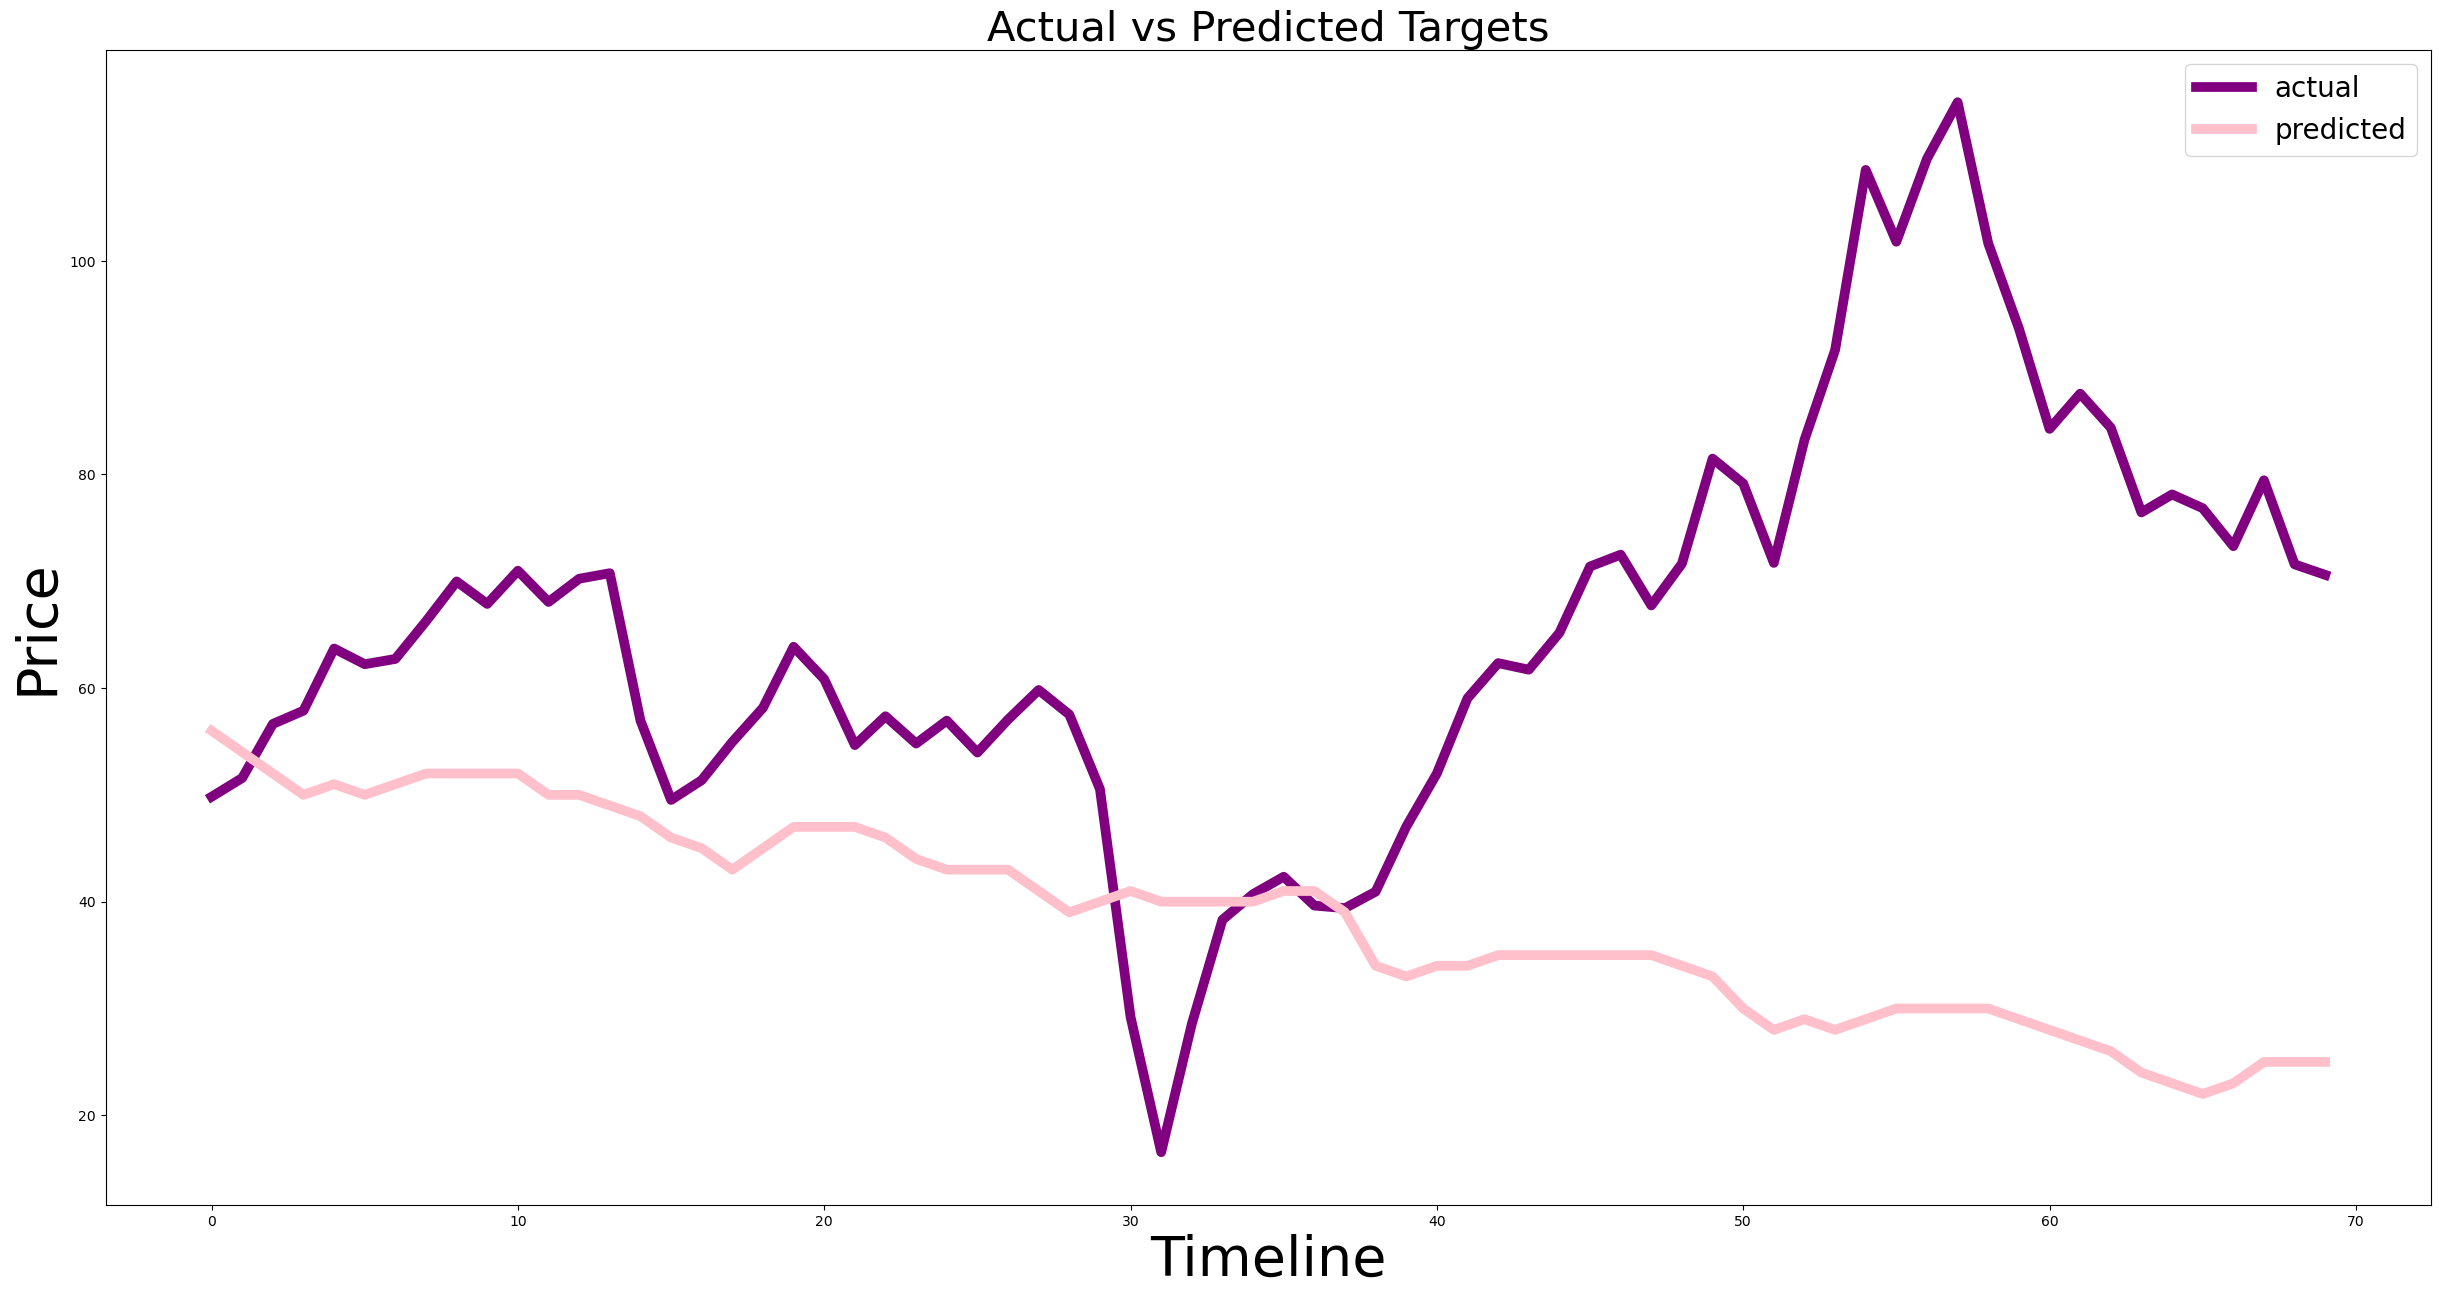

In [95]:
plt.figure(figsize=(30,15))
plt.plot(test_data["y"],label="actual",color="Purple",linewidth=7.0)
plt.plot(y_predicted,label="predicted",color="pink",linewidth=7.0)
plt.title("Actual vs Predicted Targets",fontsize=30)
plt.xlabel('Timeline',fontsize=40)
plt.ylabel('Price',fontsize=40)
plt.legend(fontsize=20)
plt.show()

In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(y_actual, y_predicted)
mape = mean_absolute_percentage_error(y_actual, y_predicted)
rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))

print(f'mae score: {mae}')
print(f'mape score: {mape}')
print(f'rmse score: {rmse}')

mae score: 28.092847682303894
mape score: 0.39185008284095074
rmse score: 36.220396845113996


In [97]:
future = model.make_future_dataframe(periods=60,freq='M')
future.tail()

ds
435 2022-04-30
436 2022-05-31
437 2022-06-30
438 2022-07-31
439 2022-08-31

In [98]:
forecast = model.predict(future)
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1986-01-31  16.464830   -1.502897   31.144948    16.464830    16.464830   
1   1986-02-28  16.496727   -0.691823   30.130840    16.496727    16.496727   
2   1986-03-31  16.532042    0.737010   32.200257    16.532042    16.532042   
3   1986-04-30  16.566217    1.568773   32.954641    16.566217    16.566217   
4   1986-05-31  16.601532    1.807947   33.837695    16.601532    16.601532   
..         ...        ...         ...         ...          ...          ...   
435 2022-04-30  29.871247   13.920713   47.521479    23.781924    36.194401   
436 2022-05-31  29.409342   13.540153   47.658061    23.153029    35.911307   
437 2022-06-30  28.962338   12.979630   48.674866    22.518873    35.697029   
438 2022-07-31  28.500434   13.857138   48.658825    21.896145    35.456764   
439 2022-08-31  28.038530   11.575676   47.408455    21.250231    35.211816   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -1.825525             -1.825525             -1.825525 -1.825525   
1         -2.417814             -2.417814             -2.417814 -2.417814   
2         -0.912946             -0.912946             -0.912946 -0.912946   
3          0.841002              0.841002              0.841002  0.841002   
4          1.064132              1.064132              1.064132  1.064132   
..              ...                   ...                   ...       ...   
435        0.841002              0.841002              0.841002  0.841002   
436        1.064132              1.064132              1.064132  1.064132   
437        1.467613              1.467613              1.467613  1.467613   
438        1.736467              1.736467              1.736467  1.736467   
439        0.963411              0.963411              0.963411  0.963411   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -1.825525     -1.825525                   0.0   
1       -2.417814     -2.417814                   0.0   
2       -0.912946     -0.912946                   0.0   
3        0.841002      0.841002                   0.0   
4        1.064132      1.064132                   0.0   
..            ...           ...                   ...   
435      0.841002      0.841002                   0.0   
436      1.064132      1.064132                   0.0   
437      1.467613      1.467613                   0.0   
438      1.736467      1.736467                   0.0   
439      0.963411      0.963411                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  14.639305  
1                           0.0                         0.0  14.078913  
2                           0.0                         0.0  15.619096  
3                           0.0                         0.0  17.407219  
4                           0.0                         0.0  17.665664  
..                          ...                         ...        ...  
435                         0.0                         0.0  30.712249  
436                         0.0                         0.0  30.473474  
437                         0.0                         0.0  30.429951  
438                         0.0                         0.0  30.236901  
439                         0.0                         0.0  29.001941  

[440 rows x 16 columns]

In [99]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
435 2022-04-30  30.712249   13.920713   47.521479
436 2022-05-31  30.473474   13.540153   47.658061
437 2022-06-30  30.429951   12.979630   48.674866
438 2022-07-31  30.236901   13.857138   48.658825
439 2022-08-31  29.001941   11.575676   47.408455

In [100]:
forecast.set_index("ds")

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
1986-01-31  16.464830   -1.502897   31.144948    16.464830    16.464830   
1986-02-28  16.496727   -0.691823   30.130840    16.496727    16.496727   
1986-03-31  16.532042    0.737010   32.200257    16.532042    16.532042   
1986-04-30  16.566217    1.568773   32.954641    16.566217    16.566217   
1986-05-31  16.601532    1.807947   33.837695    16.601532    16.601532   
...               ...         ...         ...          ...          ...   
2022-04-30  29.871247   13.920713   47.521479    23.781924    36.194401   
2022-05-31  29.409342   13.540153   47.658061    23.153029    35.911307   
2022-06-30  28.962338   12.979630   48.674866    22.518873    35.697029   
2022-07-31  28.500434   13.857138   48.658825    21.896145    35.456764   
2022-08-31  28.038530   11.575676   47.408455    21.250231    35.211816   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
1986-01-31       -1.825525             -1.825525             -1.825525   
1986-02-28       -2.417814             -2.417814             -2.417814   
1986-03-31       -0.912946             -0.912946             -0.912946   
1986-04-30        0.841002              0.841002              0.841002   
1986-05-31        1.064132              1.064132              1.064132   
...                    ...                   ...                   ...   
2022-04-30        0.841002              0.841002              0.841002   
2022-05-31        1.064132              1.064132              1.064132   
2022-06-30        1.467613              1.467613              1.467613   
2022-07-31        1.736467              1.736467              1.736467   
2022-08-31        0.963411              0.963411              0.963411   

              yearly  yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                       
1986-01-31 -1.825525     -1.825525     -1.825525                   0.0   
1986-02-28 -2.417814     -2.417814     -2.417814                   0.0   
1986-03-31 -0.912946     -0.912946     -0.912946                   0.0   
1986-04-30  0.841002      0.841002      0.841002                   0.0   
1986-05-31  1.064132      1.064132      1.064132                   0.0   
...              ...           ...           ...                   ...   
2022-04-30  0.841002      0.841002      0.841002                   0.0   
2022-05-31  1.064132      1.064132      1.064132                   0.0   
2022-06-30  1.467613      1.467613      1.467613                   0.0   
2022-07-31  1.736467      1.736467      1.736467                   0.0   
2022-08-31  0.963411      0.963411      0.963411                   0.0   

            multiplicative_terms_lower  multiplicative_terms_upper       yhat  
ds                                                                             
1986-01-31                         0.0                         0.0  14.639305  
1986-02-28                         0.0                         0.0  14.078913  
1986-03-31                         0.0                         0.0  15.619096  
1986-04-30                         0.0                         0.0  17.407219  
1986-05-31                         0.0                         0.0  17.665664  
...                                ...                         ...        ...  
2022-04-30                         0.0                         0.0  30.712249  
2022-05-31                         0.0                         0.0  30.473474  
2022-06-30                         0.0                         0.0  30.429951  
2022-07-31                         0.0                         0.0  30.236901  
2022-08-31                         0.0                         0.0  29.001941  

[440 rows x 15 columns]

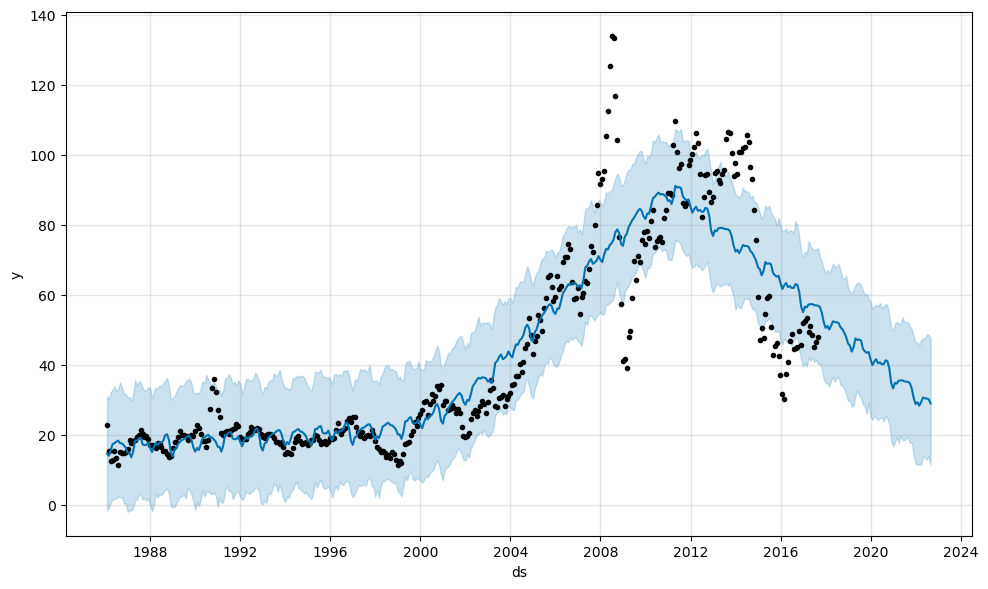

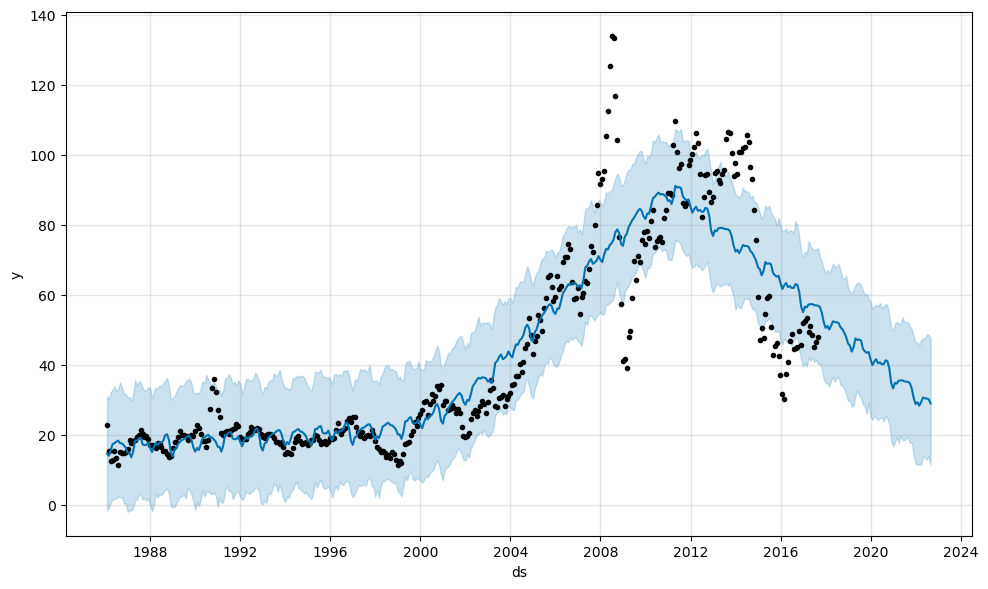

In [101]:
model.plot(forecast)

In [102]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

## <p style='color:white;font-size:1%;'>Model Comparision</p>
<h2 style="background-color:black;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> MODELS COMPARISION </h2>

In [103]:
comparision_df = pd.DataFrame(data=[['Linear Regression', 20.687 , 15.747],
                           ['Random Forest', 1.8116,  0.8995],
                          ['K-Nearest Neighbur', 2.668, 1.1617],
                          ['XG-Boost', 2.617, 1.178],
                          ['LSTM', 4.5790, 3.2195],
                          ['Arima', 28.0015, 22.134],
                          ['prophet', 36.220, 28.092]], columns=['Model','RMSE','MAE'])

comparision_df.set_index('Model', inplace=True)

In [104]:
comparision_df.sort_values(by='RMSE')

RMSE      MAE
Model                               
Random Forest        1.8116   0.8995
XG-Boost             2.6170   1.1780
K-Nearest Neighbur   2.6680   1.1617
LSTM                 4.5790   3.2195
Linear Regression   20.6870  15.7470
Arima               28.0015  22.1340
prophet             36.2200  28.0920

<div style="color:white;
           display:fill;
           background-color:black;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observation 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1.Even though the RMSE value of Random forest and other models is less than FB Prophet model, Random forest fails to capture the trend component and seasonality. <br>
           2.The Random forest and other models shows a clear sign of overfitting and Prophet model performs well in predicting future values. <br>
           3.Therefore we have decided to go with Prophet model for deployment purpose.<br>
           4.Since there are many external factors affecting the oil price which the Prophet model fails to capture, there is definitely room for improvement. <br>
         </p>
    </div>